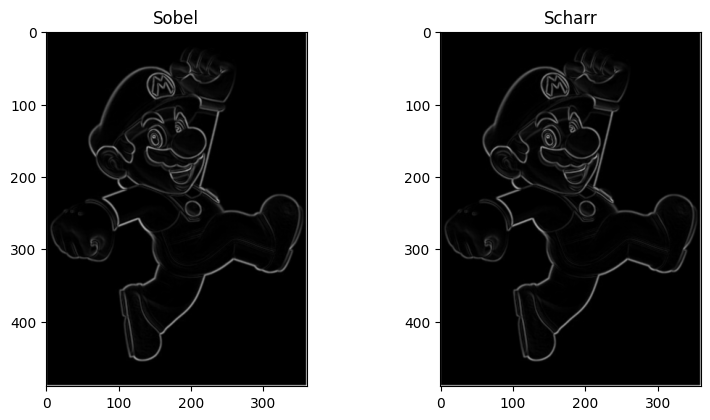

In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# convert to grayscale
img = cv2.imread('img.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# apply custom convolution
def apply_kernel(image, kernel):
    h, w = image.shape
    kh, kw = kernel.shape
    pad = kh // 2
    padded = np.pad(image, pad, mode='constant', constant_values=0)
    output = np.zeros_like(image, dtype=np.float32)

    for i in range(h):
        for j in range(w):
            region = padded[i:i+kh, j:j+kw]
            output[i, j] = np.sum(region * kernel)
    return output

# Gaussian kernel (3x3) (light blur)
gaussian_kernel = (1/16) * np.array([
    [1, 2, 1],
    [2, 4, 2],
    [1, 2, 1]
])

# Gaussian blur
blurred = apply_kernel(gray, gaussian_kernel).astype(np.uint8)

# Sobel Kernels
sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])
sobel_y = np.array([[-1, -2, -1],
                    [ 0,  0,  0],
                    [ 1,  2,  1]])

# Scharr Kernels
scharr_x = np.array([[-3,  0,  3],
                     [-10, 0, 10],
                     [-3,  0,  3]])
scharr_y = np.array([[-3, -10, -3],
                     [ 0,   0,  0],
                     [ 3,  10,  3]])

# compute gradient magnitudes
def compute_edges(image, kernel_x, kernel_y):
    gx = apply_kernel(image, kernel_x)
    gy = apply_kernel(image, kernel_y)
    mag = np.abs(gx) + np.abs(gy)
    mag = (mag / mag.max()) * 255
    return mag.astype(np.uint8)

# compute sobel and scharr edges on the sharpened image
sobel_edges = compute_edges(blurred, sobel_x, sobel_y)
scharr_edges = compute_edges(blurred, scharr_x, scharr_y)

plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.imshow(sobel_edges, cmap='gray')
plt.title('Sobel')

plt.subplot(2, 3, 2)
plt.imshow(scharr_edges, cmap='gray')
plt.title('Scharr')

plt.tight_layout()
plt.show()
